# Merging Function

There are osome functions for merging we haven't looked at yet. I've made up some temperature data for us to play with.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df_aus = pd.read_csv(r'aus.csv', parse_dates=['date'], dayfirst=True)
df_usa = pd.read_csv(r'usa.csv', parse_dates=['date'], dayfirst=True)
df_bris = pd.read_csv(r'brisbane.csv', parse_dates=['date'], dayfirst=True)

display(df_aus.head(), df_usa.head(), df_bris.head())

,date,temperature
0,2000-01-20,30.6
1,2001-01-20,32.7
2,2002-01-20,31.2
3,2003-01-20,30.5
4,2004-01-20,31.5


,date,temperature
0,2000-03-01,15.25
1,2000-09-01,15.77
2,2001-03-01,15.98
3,2001-09-01,16.55
4,2002-03-01,15.32


,date,temperature
0,2000-01-01,30.15
1,2000-01-08,30.31
2,2000-01-15,30.99
3,2000-01-22,30.94
4,2000-01-29,29.95


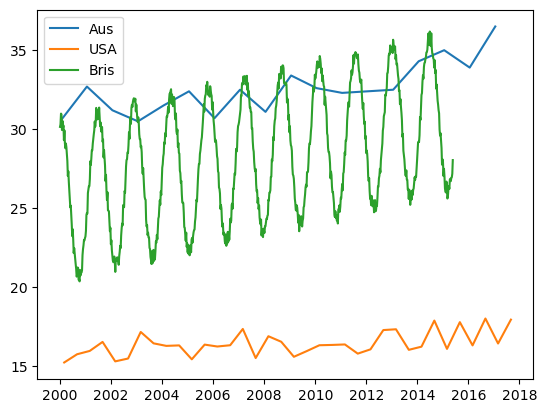

In [8]:
plt.plot(df_aus.date, df_aus.temperature, label='Aus')
plt.plot(df_usa.date, df_usa.temperature, label='USA')
plt.plot(df_bris.date, df_bris.temperature, label='Bris')
plt.legend();

## Ordering Merging

Designed for merging ordered data, like time series data. So what if we wanted to combine our two sources into one?

In [9]:
pd.merge(df_aus, df_usa, on='date', how='outer')

,date,temperature_x,temperature_y
0,2000-01-20,30.6,NaN
1,2000-03-01,NaN,15.25
2,2000-09-01,NaN,15.77
3,2001-01-20,32.7,NaN
4,2001-03-01,NaN,15.98
5,2001-09-01,NaN,16.55
6,2002-01-20,31.2,NaN
7,2002-03-01,NaN,15.32
8,2002-09-01,NaN,15.50
9,2003-01-20,30.5,NaN


In [10]:
pd.merge_ordered(df_aus, df_usa, on='date', suffixes=('_aus', '_usa')).head(10)

,date,temperature_aus,temperature_usa
0,2000-01-20,30.6,NaN
1,2000-03-01,NaN,15.25
2,2000-09-01,NaN,15.77
3,2001-01-20,32.7,NaN
4,2001-03-01,NaN,15.98
5,2001-09-01,NaN,16.55
6,2002-01-20,31.2,NaN
7,2002-03-01,NaN,15.32
8,2002-09-01,NaN,15.50
9,2003-01-20,30.5,NaN


In [11]:
pd.merge_ordered(df_aus, df_usa, on='date', suffixes=('_aus', '_usa'), fill_method='ffill').head(10)

,date,temperature_aus,temperature_usa
0,2000-01-20,30.6,NaN
1,2000-03-01,30.6,15.25
2,2000-09-01,30.6,15.77
3,2001-01-20,32.7,15.77
4,2001-03-01,32.7,15.98
5,2001-09-01,32.7,16.55
6,2002-01-20,31.2,16.55
7,2002-03-01,31.2,15.32
8,2002-09-01,31.2,15.50
9,2003-01-20,30.5,15.50


Tada! A very basic forward-filled interpolate merged and ordered dataframe.

## Merging with partial/closest matches
Let's say we don't want the huge amount of data in the Brisbane temperatures, but we only want the closest temperature to a given date in either the Australia or USA temperatures.

In [12]:
df_both = pd.merge_ordered(df_aus, df_usa, on='date', suffixes=('_aus', '_usa'), fill_method='ffill').head(10)
df_all = pd.merge_asof(df_both, df_bris, on='date').rename(columns={'temperature': 'temperature_bris'})
df_all

,date,temperature_aus,temperature_usa,temperature_bris
0,2000-01-20,30.6,NaN,30.99
1,2000-03-01,30.6,15.25,29.31
2,2000-09-01,30.6,15.77,20.68
3,2001-01-20,32.7,15.77,24.71
4,2001-03-01,32.7,15.98,26.40
5,2001-09-01,32.7,16.55,29.21
6,2002-01-20,31.2,16.55,21.99
7,2002-03-01,31.2,15.32,21.66
8,2002-09-01,31.2,15.50,28.50
9,2003-01-20,30.5,15.50,30.45


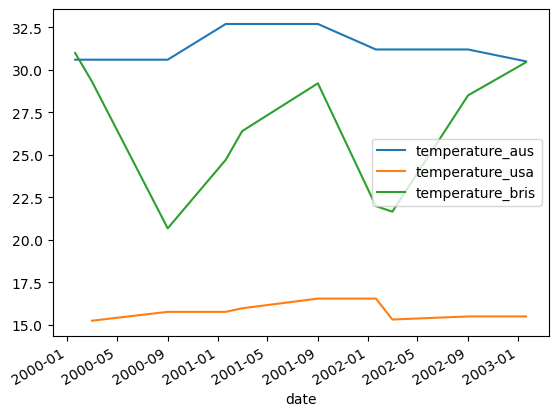

In [16]:
df_all.plot('date', ['temperature_aus', 'temperature_usa', 'temperature_bris']);

<Axes: xlabel='date'>

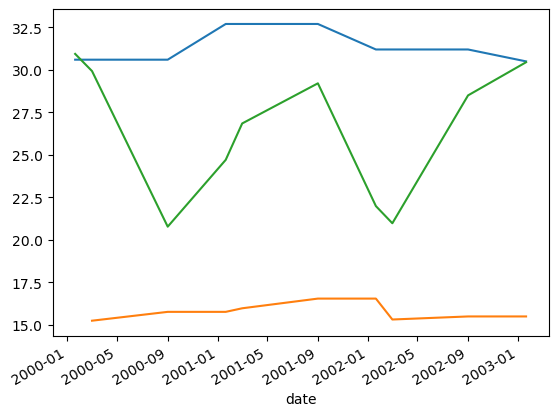

In [20]:
df_tmp = pd.merge_asof(df_both, df_bris, on='date', tolerance=pd.Timedelta('14 days'), direction='nearest')
df_tmp.plot('date', df_tmp.columns[1:], legend=False)

For merge_asof you merge on ordered column, like timme or date. But if you want to still match other columns, there is a left_by and right_by you can use.

Super useful utilities when the need arises for them. Doing it manually would be possible, but painful and slow.

## Recap
- merge_ordered
- merge_asof